In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib as cm
from torch import optim
from data import *
from util import *

In [2]:
def prepare_dataset(path):
    pattern2training, pattern2truecard, min_card_log, max_card_log = prepare_pattern_workload(path)
    print('min_card_log: {}, max_card_log: {}'.format(min_card_log, max_card_log))

    for k, v in pattern2training.items():
        train_data = np.array(v)
        labels = normalize(pattern2truecard[k], min_card_log, max_card_log)
        batch_size = 5000
        training_data = torch.FloatTensor(train_data)
        training_label = torch.FloatTensor(labels).unsqueeze(1)
        train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(training_data, training_label),
                                                   batch_size=batch_size, shuffle=False)
        return train_loader

In [3]:
# 准备测试集
train_loader = prepare_dataset('workloads/forest1/foresttrain.sql')
# 准备测试集
test_loader = prepare_dataset('workloads/forest1/foresttest.sql')

source_train , _ = next(iter(train_loader))
target_train , _ =next(iter(test_loader))

min_card_log: 0.0, max_card_log: 13.272524968529178
min_card_log: 0.0, max_card_log: 13.272519805102418


KeyboardInterrupt: 

In [36]:
def plot_distribution(source_train,target_train):
    # Create a two dimensional t-SNE projection of the embeddings
    tsne = TSNE(2, verbose=1)
    if source_train.is_cuda:
        source_train = source_train.cpu().detach().numpy()
    else:
        source_train = source_train.detach().numpy()
    if target_train.is_cuda:
        target_train = target_train.cpu().detach().numpy()
    else:
        target_train = target_train.detach().numpy()
    tsne_source = tsne.fit_transform(source_train)
    tsne_target = tsne.fit_transform(target_train)
    # Plot those points as a scatter plot and label them based on the pred labels
    fig, ax = plt.subplots(figsize=(8,8))
    num_categories = 2
    for lab in range(num_categories):
        if lab ==0:
            ax.scatter(tsne_source[:,0],tsne_source[:,1], c='red', label = 'source' ,alpha=0.5)
        else:
            ax.scatter(tsne_target[:,0],tsne_target[:,1], c='blue', label = 'target' ,alpha=0.5)
    ax.legend(fontsize='large', markerscale=2)
    plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.017s...
[t-SNE] Computed neighbors for 5000 samples in 0.859s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.133255
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.396744
[t-SNE] KL divergence after 1000 iterations: 1.129419
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.017s...
[t-SNE] Computed neighbors for 5000 samples in 0.551s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional 

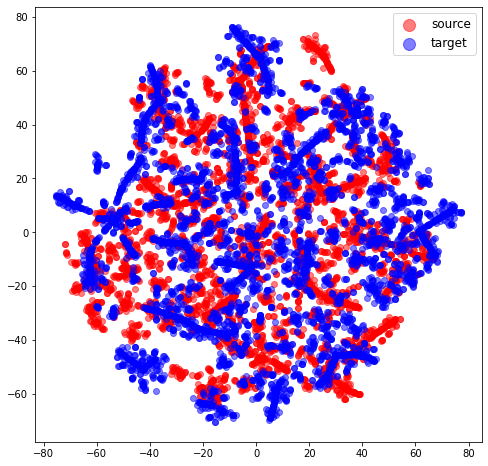

In [37]:
plot_distribution(source_train, target_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.019s...
[t-SNE] Computed neighbors for 5000 samples in 0.931s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.133255
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.337891
[t-SNE] KL divergence after 1000 iterations: 1.138007
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.017s...
[t-SNE] Computed neighbors for 5000 samples in 0.554s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional 

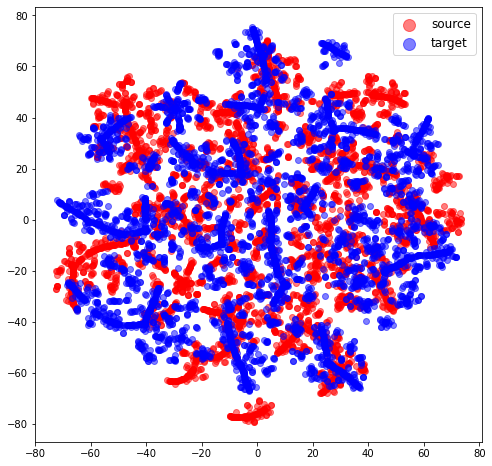

In [38]:
plot_distribution(source_train, target_train)